# day 127 and day 128

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = np.arange(1,1000,1)
y = ((5*x)/0.2) + 32

# expanding the dimension
x = np.expand_dims(x,axis=1)

# train-test-split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [ ]:
x_train.shape

(799, 1)

In [ ]:
# building a model
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'))
model.add(tf.keras.layers.Dense(1,name='output_layer'))

# compilation
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.MeanSquaredError()])


# fitting the model
history = model.fit(x_train,y_train,epochs=100,verbose=False)

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan


[nan, nan]

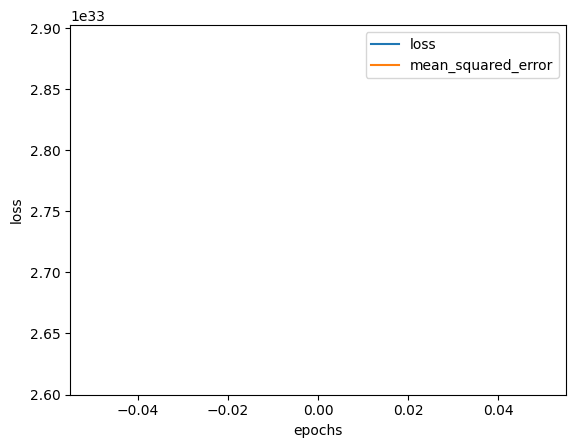

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# building another model with four neural networks

# changes made:
1. hidden_layer Dense(30) added
2. hidden_layer Dense(60) added
3. optimizer: Adam(learning_rate=0.001)
4. epochs: 200


In [ ]:
# building the model
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1,input_shape=[1],name='Input_layer'))
model1.add(tf.keras.layers.Dense(30,name='hidden_layer1'))
model1.add(tf.keras.layers.Dense(60,name='hidden_layer2'))
model1.add(tf.keras.layers.Dense(1,name='Output_layer'))

# compiling the model
model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

# fitting the model
history = model1.fit(x_train,y_train,epochs=200,verbose=False)

In [ ]:
model1.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 58.8842 - mean_squared_error: 4525.3208


[58.88422393798828, 4525.32080078125]

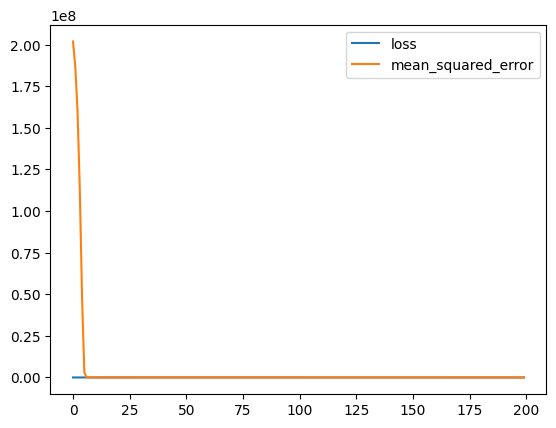

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                60        
                                                                 
 hidden_layer2 (Dense)       (None, 60)                1860      
                                                                 
 Output_layer (Dense)        (None, 1)                 61        
                                                                 
Total params: 1,983
Trainable params: 1,983
Non-trainable params: 0
_________________________________________________________________


# building another model

# change made:
1. incorporating activation='relu' in hidden layers

In [ ]:
# building the model
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(200,input_shape=[1],name='Input_layer'))
model2.add(tf.keras.layers.Dense(105,activation='relu',name='hidden_layer1'))
model2.add(tf.keras.layers.Dense(45,activation='relu',name='hidden_layer2'))
model2.add(tf.keras.layers.Dense(1,name='Output_layer'))

# compiling the model
model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[tf.keras.metrics.MeanSquaredError()])

# fitting the model
history = model2.fit(x_train,y_train,epochs=100,verbose=False)

In [ ]:
model2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 2.7310 - mean_squared_error: 8.1955


[2.731009006500244, 8.195469856262207]

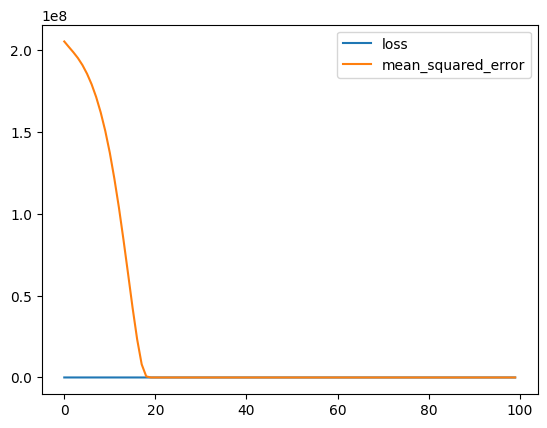

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                60        
                                                                 
 hidden_layer2 (Dense)       (None, 60)                1860      
                                                                 
 Output_layer (Dense)        (None, 1)                 61        
                                                                 
Total params: 1,983
Trainable params: 1,983
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# testing with few data

model2.predict([9,10,11])

1/1 [==============================] - 0s 97ms/step


array([[255.14021],
       [280.14053],
       [305.14084]], dtype=float32)

# deal with insurance data

# day 128

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# # column transforming:
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)


# x and y definition
x = df.drop('charges',axis=1)
y = df['charges']


# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# ct fitting and transforming
x_train_transformed = ct.fit_transform(x_train)
x_test_transformed = ct.transform(x_test)



# model building

In [ ]:
# setting the random seed
tf.random.set_seed(42)

# building the neural model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500,name='input_layer'))
model.add(tf.keras.layers.Dense(450,activation='relu',name='hidden_layer1'))
model.add(tf.keras.layers.Dense(180,activation='relu',name='hidden_layer2'))
model.add(tf.keras.layers.Dense(189,activation='relu',name='hidden_layer3'))
model.add(tf.keras.layers.Dense(150,activation='relu',name='hidden_layer4'))
model.add(tf.keras.layers.Dense(100,activation='relu',name='hidden_layer5'))
model.add(tf.keras.layers.Dense(1,name='output_layer'))

# compiling the neural model
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.keras.metrics.MeanSquaredError()])


# fitting the model
history = model.fit(x_train_transformed,y_train,epochs=100,verbose=False)

# evaluate the model with unseen data
model.evaluate(x_test_transformed,y_test)

9/9 [==============================] - 0s 10ms/step - loss: 1500.8711 - mean_squared_error: 19356352.0000


[1500.87109375, 19356352.0]

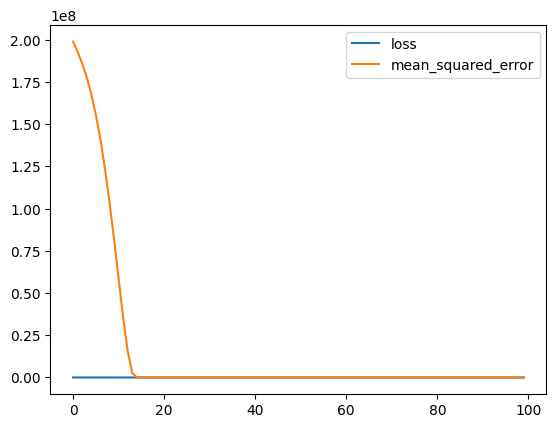

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

# day 128

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
# importing boston_house_price dataset

  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)


In [ ]:
x_train.shape,x_test.shape,y_train.shape

((404, 13), (102, 13), (404,))

In [ ]:
# scaling the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [ ]:
# setting random seed
tf.random.set_seed(42)


# building the model
model_boston = tf.keras.Sequential()
model_boston.add(tf.keras.layers.Dense(100,name='input_layer'))
model_boston.add(tf.keras.layers.Dense(50,activation='relu',name='hidden_layer1'))
model_boston.add(tf.keras.layers.Dense(100,activation='relu',name='hidden_layer2'))
model_boston.add(tf.keras.layers.Dense(120,activation='relu',name='hidden_layer3'))
model_boston.add(tf.keras.layers.Dense(1,name='output_layer')) #since the output is only a single number.

# compiling the model
model_boston.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=[tf.keras.metrics.MeanSquaredError()])

# fittig the neural model
history = model_boston.fit(x_train_scaled,y_train,epochs=100,verbose=False)


# evaluate the model
model_boston.evaluate(x_test_scaled,y_test)



4/4 [==============================] - 0s 4ms/step - loss: 2.2625 - mean_squared_error: 9.6687


[2.2625112533569336, 9.668721199035645]

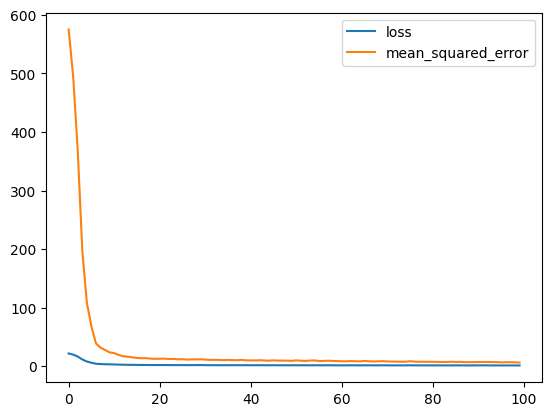

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

# day 130 and day 131

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

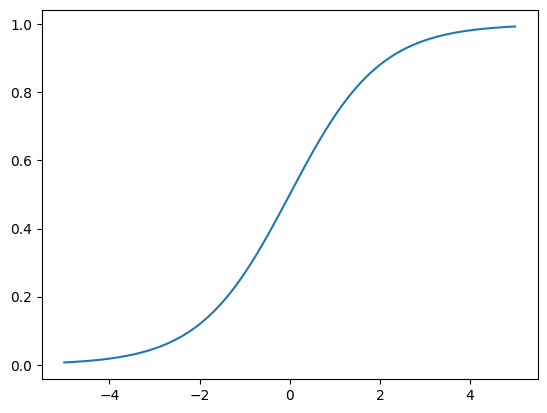

In [ ]:
z = np.linspace(-5,5,10000)

sigmoid = 1/(1+np.exp(-z))

plt.plot(z,sigmoid)

plt.show()

In [ ]:
np.max(sigmoid)

0.9933071490757153

In [ ]:
np.min(sigmoid)

0.0066928509242848554

In [ ]:
n = 5

weights = np.array([88,22,26,12,94]).T
inputs  = np.array([1,2,3,4,5])
bias    = 10

perceptron = np.dot(weights,inputs) + bias

perceptron

738

In [ ]:
# sigmoid perceptron

sigmoid_neuron = 1/(1+np.exp(-perceptron))
sigmoid_neuron

1.0

In [ ]:


n = 5

weights = np.array([0,22,26,12,94]).T
inputs  = np.array([0,2,3,4,5])
bias    = 10

constant = 5

weights = constant * weights
inputs  = constant * inputs

perceptron = np.dot(weights,inputs) + bias

perceptron

16010

In [ ]:
# sigmoid neuron scaled

sigmoid_neuron_scaled = 1/(1+np.exp(-perceptron))
sigmoid_neuron_scaled

1.0

# negative and positive perceptrons on sigmoid function

In [ ]:

n = 100

weights = np.random.randint(0,9,(n)).T
inputs  = np.random.randint(0,9,(n))
bias    = 10

constant = np.linspace(-10000,10000,n)


perceptron = constant * np.dot(weights,inputs) + bias

perceptron

array([-15899990.        , -15578777.87878788, -15257565.75757576,
       -14936353.63636364, -14615141.51515152, -14293929.39393939,
       -13972717.27272727, -13651505.15151515, -13330293.03030303,
       -13009080.90909091, -12687868.78787879, -12366656.66666667,
       -12045444.54545454, -11724232.42424242, -11403020.3030303 ,
       -11081808.18181818, -10760596.06060606, -10439383.93939394,
       -10118171.81818182,  -9796959.6969697 ,  -9475747.57575758,
        -9154535.45454546,  -8833323.33333333,  -8512111.21212121,
        -8190899.09090909,  -7869686.96969697,  -7548474.84848485,
        -7227262.72727273,  -6906050.60606061,  -6584838.48484848,
        -6263626.36363636,  -5942414.24242424,  -5621202.12121212,
        -5299990.        ,  -4978777.87878788,  -4657565.75757576,
        -4336353.63636364,  -4015141.51515152,  -3693929.39393939,
        -3372717.27272727,  -3051505.15151515,  -2730293.03030303,
        -2409080.90909091,  -2087868.78787879,  -1766656.66666

<ipython-input-50-0fee68fff9f7>:3: RuntimeWarning: overflow encountered in exp
  sigmoid_neuron_scaled = 1/(1+np.exp(-perceptron))


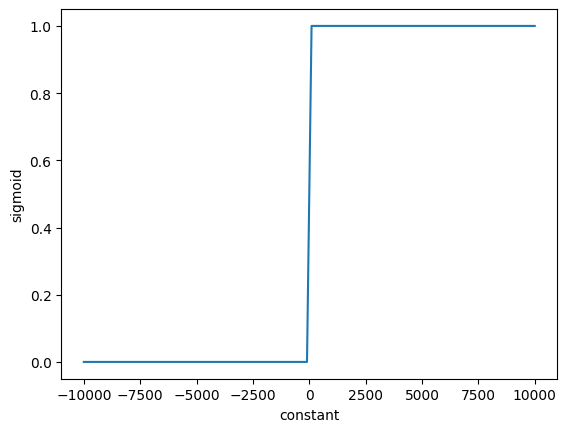

In [ ]:
# sigmoid neuron scaled

sigmoid_neuron_scaled = 1/(1+np.exp(-perceptron))


plt.plot(constant,sigmoid_neuron_scaled)

plt.xlabel('constant')
plt.ylabel('sigmoid')

plt.show()